In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
# # Dit df omzetten naar een csv:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html?highlight=csv#pandas.DataFrame.to_csv
# # pd.healthData.to_csv(healthDataCsv)
# healthData.to_csv('healthData.csv')
# healthData.to_csv('healthDataOrig.csv')

In [60]:
#Read csv file
# lsd = LifeStyleData
lsdOrig = pd.read_csv('lsdata230308.csv')
lsd = pd.read_csv('lsdata230308.csv')


## Betekenis van de data: 

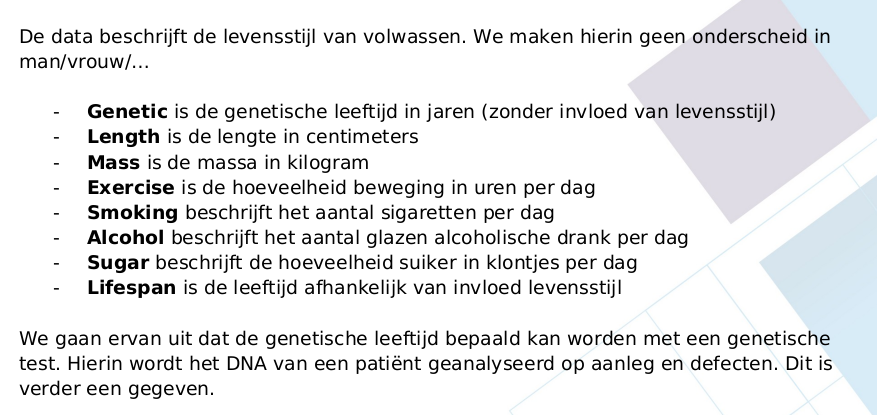

## Exploratory Data Analysis

In [12]:
lsd.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178,71.6,1.5,8.3,4.9,5.5,75.0


In [11]:
lsd.tail()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
4091,80.3,176,115.9,3.7,0.1,5.6,5.8,80.7
4092,75.3,162,129.6,3.6,6.2,5.6,7.6,71.1
4093,93.1,189,115.3,2.7,9.4,4.9,6.6,90.0
4094,77.9,170,90.8,2.3,13.2,0.8,6.2,75.9
4095,101.3,188,129.2,1.2,8.2,6.0,6.2,96.9


In [6]:
lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB


In [7]:
lsd.describe()

,smoking,lifespan
count,4096.000000,4096.000000
mean,9.807446,80.127783
std,6.921461,8.042270
min,0.000000,-1.000000
25%,3.300000,75.000000
50%,9.500000,79.700000
75%,15.900000,85.200000
max,22.200000,105.100000


Er zijn 8 kolommen met cijfers die eruit zien als floats.  
Van 6 van die kolommen is het Dtype echter een object (mogelijk een string).  
Eerste actie = Dtype van de zes kolommen omzetten naar floats.

## Objects omzetten in floats
- https://pandas.pydata.org/pandas-'genetic': 'float64','genetic': 'float64','genetic': 'float64',docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype  
Cast col1 to int32 using a dictionary:  
df.astype({'col1': 'int32'}).dtypes  
*Mijn oplossing:*
- lsd.astype({'genetic': 'float64', 'length': 'float64','mass': 'float64','exercise': 'float64','alcohol': 'float64','sugar': 'float64',}).dtypes  
-  Dit geeft jammer genoeg een foutmelding: " could not convert string to float: '?' "  
- Het lijkt erop dat er vraagteken(s) in het df staan.  


In [30]:
#lsd.select_dtypes(include=['object'])

#lsd.query("lifespan == '?'") 
# op regel 3398 staat bij 'genetic'een vraagteken
# in de kolom 'lenght' staat geen vraagteken
# in de kolom 'mass' vraagtekens op regels 2721 en 4027
# in de kolom 'exercise' vraagteken in regel 2576
# in de kolom 'smoking' geen vraagtekens 
# in de kolom 'alcohol' vraagtekens in de regels 947 en 2354
# in de kolom 'sugar' vraagteken in regel 2793
# in de kolom 'lifespan' geen vraagteken 

In [100]:
qm = ['?']
display(lsd.isin(qm).sum())
# There are only 7 rows wiht a questionmark. I'll discard of them.

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
dtype: int64

In [67]:
#colNmsList['genetic','mass','exercise','alcohol','sugar']lsd = lsd.drop( lsd.query("sugar =='?' ").index)
display(lsd.shape)
# Nu handmatig bij alle kolommen het vraagteken verwijderd. Dat moet handiger kunnen. Uitzoeken hoe. Je zou denken dat je een lijst afloopt met de namen van de  kolommen waarin een vraagteken staat en vervolgens een drop-actie afloopt.

(4096, 8)

In [66]:
qm = ['?']
display(lsd.isin(qm).sum())
display(lsd.shape)

genetic     1
length      0
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64

(4096, 8)

In [63]:
lsd.query("mass == '?'") 

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
2721,88.9,179,?,3.1,0.2,0.5,5.1,91.5
4027,67.3,180,?,1.6,0.0,0.4,5.3,67.9


Ik heb nu een aantal regels verwijderd, maar ik heb nog steeds de regels waarin een vraagteken staat???

In [68]:

lsd = pd.read_csv('lsdata230308.csv')
display(lsd.shape)

(4096, 8)

In [69]:
# https://stackoverflow.com/questions/38185688/select-rows-containing-certain-values-from-pandas-dataframe
lsd[(lsd == '?').any(axis=1)]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
947,82.0,193,68.0,1.3,17.2,?,1.2,75.3
2354,74.8,183,123.2,2.3,13.8,?,8.1,70.4
2576,76.4,174,90.9,?,21.7,0.4,3.7,71.0
2721,88.9,179,?,3.1,0.2,0.5,5.1,91.5
2793,78.0,178,71.9,1.3,0.1,4.1,?,77.4
3398,?,204,72.0,1.0,9.9,0.4,5.4,83.0
4027,67.3,180,?,1.6,0.0,0.4,5.3,67.9


In [72]:
#lsd.astype({'genetic': 'float64', 'length': 'float64','mass': 'float64','exercise': 'float64','alcohol': 'float64','sugar': 'float64',}).dtypes 


## Nieuwe ronde, nieuwe kansen
Oplossing vanuit mijn team: de csv opnieuw inlezen met een correctie voor de vraagtekens


In [74]:
lsd = pd.read_csv('lsdata230308.csv', na_values=["?", "undefined"])

In [76]:
lsd.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0


In [85]:
#lsd.describe()

In [87]:
duplicate_rows_lsd = lsd[lsd.duplicated()]
print("number of duplicate rows: ", duplicate_rows_lsd.shape)
# Conclusion: no duplicate rows

number of duplicate rows:  (0, 8)


In [79]:
lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


In [80]:
lsd.shape

(4096, 8)

In [82]:
display(lsd.isna().any().sum()) #telt het aantal kolommen met een Nan waarde
display(lsd.isna().sum()) # toont het aantal kolommen met de aantallen NaN waardes (10 x een Nan)

6

genetic     1
length      3
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64

## Discarding data

In [84]:
lsd = lsd.dropna()
display(lsd.shape)

(4086, 8)

In [86]:
lsd.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,82.280127,183.879344,92.273837,2.403353,9.812677,2.266006,6.484973,80.137959
std,7.440070,12.627470,25.800771,1.170593,6.919057,1.801020,2.709868,8.041656
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,-1.000000
25%,77.600000,175.000000,71.425000,1.500000,3.400000,0.600000,4.400000,75.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000
75%,86.700000,193.000000,110.875000,3.200000,15.900000,4.000000,8.400000,85.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000


### Observations:
- I have dropped 10 rows with a NaN 'value'. 10 rows on a df with nearly 5000 rows is not a significant amount of rows.
- 'genetic' age lies between 63.9 and 102.2 years. This seems quite normal.
- 'length' min: 154 cm, max: 214 cm. 214 cm is very tall, but not impossible (acromegaly). Are there many entries over 200 cm?
- 'mass' min: 50 kg, max: 163.6 kg. The max weight seems extreme, but is not unheard of. 
- 'exercise' between min: 0.1 hours (= 6 minutes), max: 5.5 hours (= 5 hrs and 30 minutes) per day. Seems 'normal'.
- 'smoking' : min: 0 en max: 22.2 cigarettes per day. 
- 'alcohol': min: 0 en max: 6 glasses per day.
- 'sugar' intake per day: min: 0.7 sugarcubes,  max: 13.8 sugarcubes per day.
- lifespan:  min: -1 years, max: 105.1 years. The minimum lifspan cannot be negative. This has to be fixed. The max lifespan seems quite old, but is not unheard of. Maybe someone who lived a very healthy life? 
- Would it be useful to create a column 'bmi'?

## Inspecting the variables, looking for outliers
Boxplots and scatterplots


### Genetic

<AxesSubplot: xlabel='genetic'>

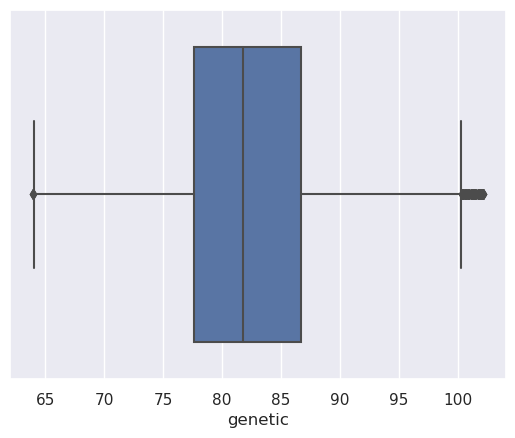

In [88]:
# Boxplot 'genetic'
sns.boxplot(x=lsd['genetic'])

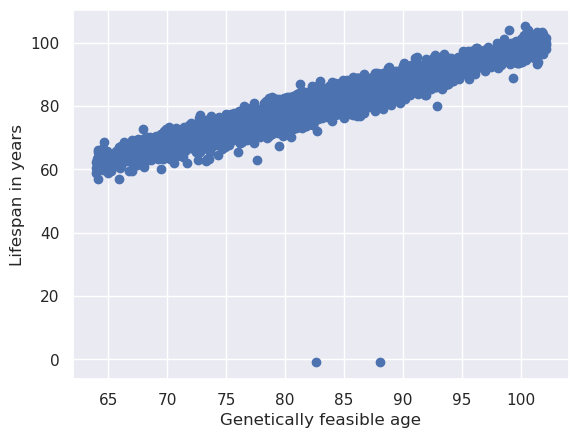

In [90]:
#scatterplot lifespan on the X-axis and genetic on the y-axis
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
#matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
y= lsd['lifespan']
x = lsd['genetic']
ylabel = plt.ylabel('Lifespan in years')
xlabel = plt.xlabel('Genetically feasible age')
display(plt.scatter(x, y))


Genetically people should be able to live at least 63 years. 
On the face of it, there are 2 outliers: people who are 0 or 'younger' than that. __I'll leave them for now and see later if the outlier correction removes them. If not I will remove them later__

The visualisation shows a positive relation between genetically feasible age and their lifespan.

In [101]:
# I want to see what the outliers look like:
outlLifespan = lsd.query("lifespan < 10") 
display(outlLifespan)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
889,88.1,156.0,112.9,0.7,19.5,0.9,3.0,-1.0
2300,82.6,188.0,63.1,3.6,15.0,0.2,1.0,-1.0


### Length

In [96]:
overTwoMtrs = lsd.query("length > 200") 
display(overTwoMtrs.shape) # Apparently there are 429 persons who are over 2 mtrs tall
print()
lengthOver210 = lsd.loc[lsd['length'] > 210]
display(lengthOver210.shape) # Apparently there are 54 persons who are over 2.1 mtrs tall
print()
length214 = lsd.loc[lsd['length'] == 214]
display(length214.shape) #there are 7 persons who are  2.14 mtrs tall

(429, 8)

(54, 8)

(7, 8)

<AxesSubplot: xlabel='length'>

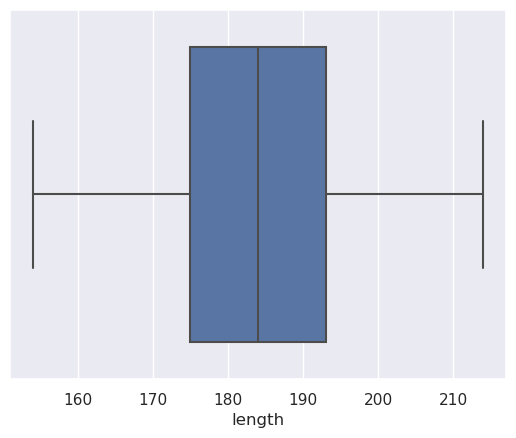

In [97]:
# Boxplot 'length'
sns.boxplot(x=lsd['length'])

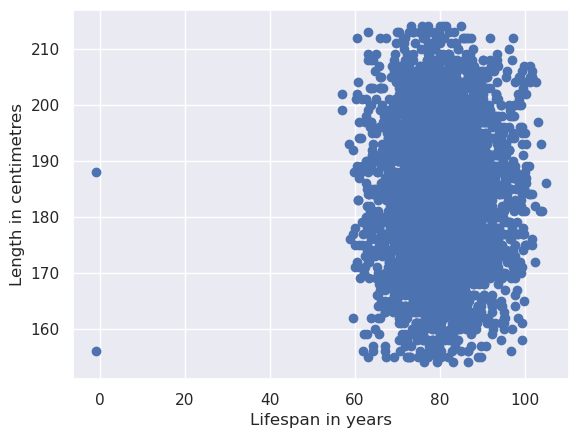

In [98]:
x= lsd['lifespan']
y = lsd['length']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Length in centimetres')
display(plt.scatter(x, y))

From this visualisation, I conclude that 'length' and (expected) lifespan have little correlation.  
(Lifespan outliers will be dealt with later.)

### Mass

<AxesSubplot: xlabel='mass'>

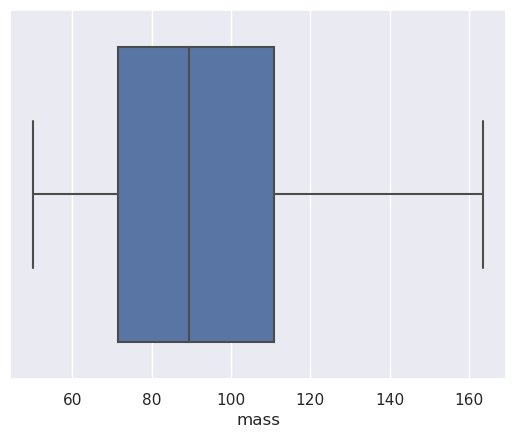

In [102]:
# Boxplot 'mass'
sns.boxplot(x= lsd['mass'])

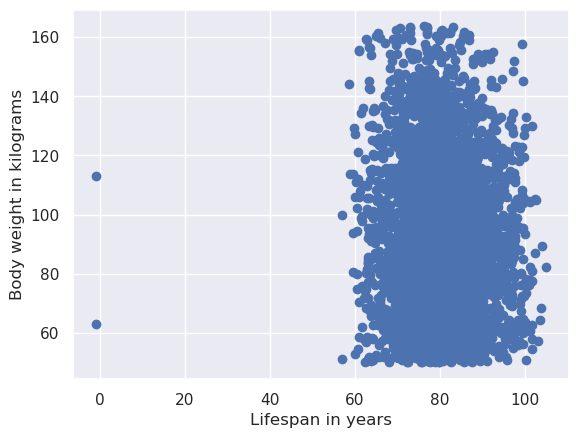

In [103]:
x= lsd['lifespan']
y = lsd['mass']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Body weight in kilograms')
display(plt.scatter(x, y))

From this visualisation, I conclude that body weight and (calculated) lifespan show a very weak negative correlation (the higher the body weight the lower the lifespan).

### Exercise

<AxesSubplot: xlabel='exercise'>

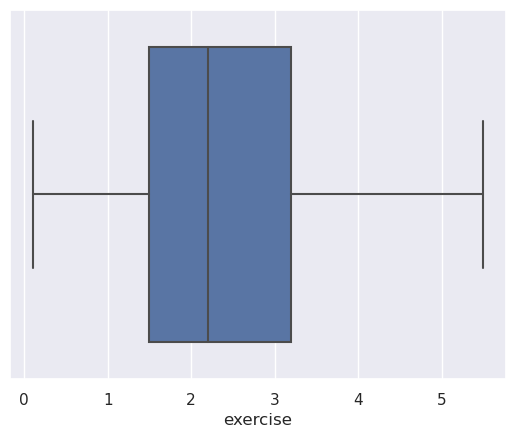

In [104]:
# Boxplot 'exercise'
sns.boxplot(x=lsd['exercise'])

In [105]:
overThreeHrsEx  = lsd.loc[lsd['exercise'] > 3]
display(overThreeHrsEx.shape)

# Apparently 1140 persons exercise over 3 hrs per day

(1140, 8)

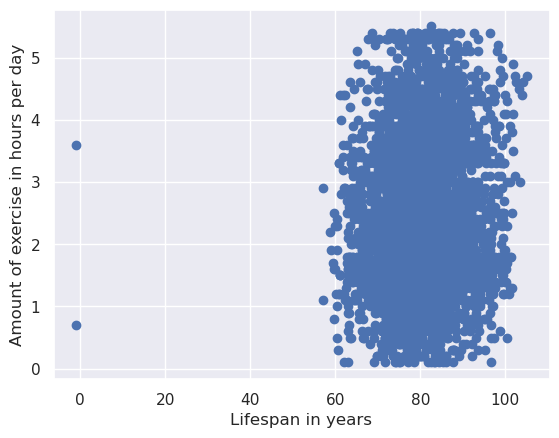

In [106]:
x = lsd['lifespan']
y = lsd['exercise']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Amount of exercise in hours per day')
display(plt.scatter(x, y))

From this visualisation, I conclude that 'exercise' and (expected) lifespan have little correlation.  

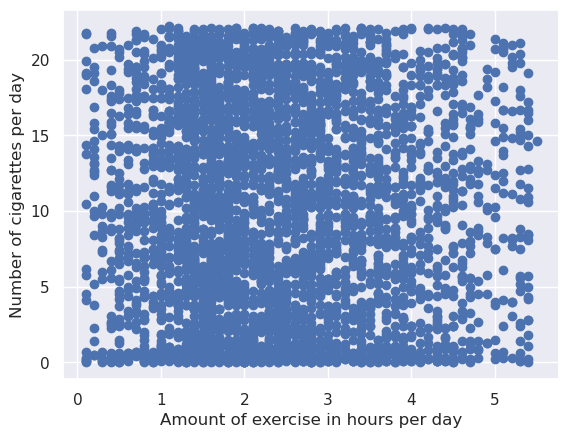

In [107]:
x = lsd['exercise']
y = lsd['smoking']
xlabel = plt.xlabel('Amount of exercise in hours per day')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

In [112]:
heaSmokSport = lsd.query('exercise > 3.0 and smoking >= 22')
display(heaSmokSport)
display(heaSmokSport.shape)
# 17 people exercise more than 3 hrs per day AND smoke 22 to '22-something' cigarettes per day

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
858,98.3,182.0,64.2,4.5,22.0,0.4,3.9,96.3
1175,91.7,184.0,81.4,4.2,22.0,5.2,7.9,86.6
1352,86.4,177.0,94.5,4.2,22.1,3.9,9.7,84.1
1454,85.0,177.0,111.6,3.4,22.0,1.2,5.9,79.4
1552,83.7,181.0,125.7,4.0,22.1,5.2,4.4,81.4
2073,83.2,181.0,62.1,3.5,22.0,3.4,4.7,81.0
2218,85.9,199.0,143.5,3.4,22.1,1.6,3.2,80.4
2837,83.6,197.0,113.3,4.3,22.0,1.8,10.3,83.4
2867,80.2,195.0,71.8,3.4,22.0,0.7,4.7,76.8
2921,67.2,200.0,69.3,3.2,22.1,1.5,3.1,63.9


(17, 8)

Strange. I queried for entries that score ' 22 and higher' on smoking. There seem to be 17 of them.  
When I look close I see that the maximum amout of cigarettes is '22.1' while lsd.describe() states that '22.2' is the max.  
Why this diference?  
It can't be a matter of rounding the numbers...

### Smoking

<AxesSubplot: xlabel='smoking'>

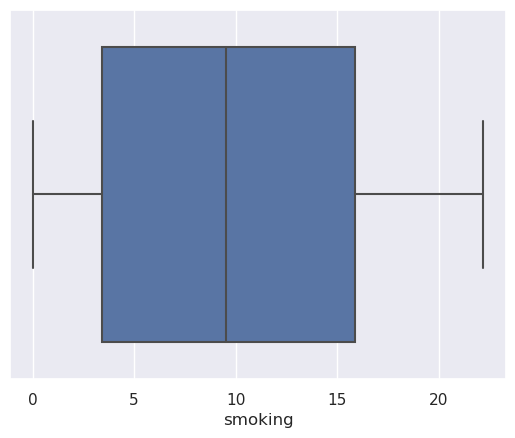

In [113]:
# Boxplot 'smoking'
sns.boxplot(x=lsd['smoking'])
# No outliers

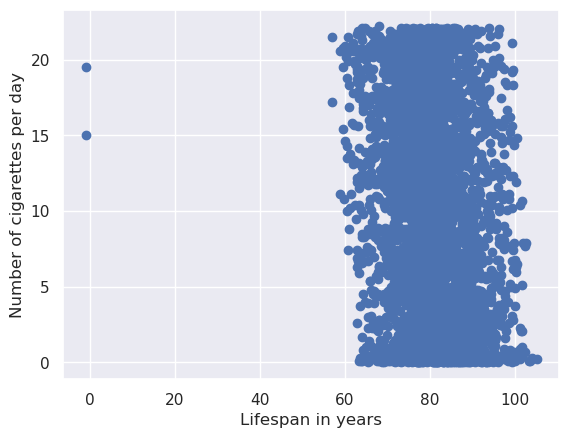

In [114]:
x = lsd['lifespan']
y = lsd['smoking']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

I conclude from this visualisation that 'smoking' and (calculated) lifespan show a quite weak negative correlation (the more cigarettes per day the lower the lifespan). 

### Sugar

<AxesSubplot: xlabel='sugar'>

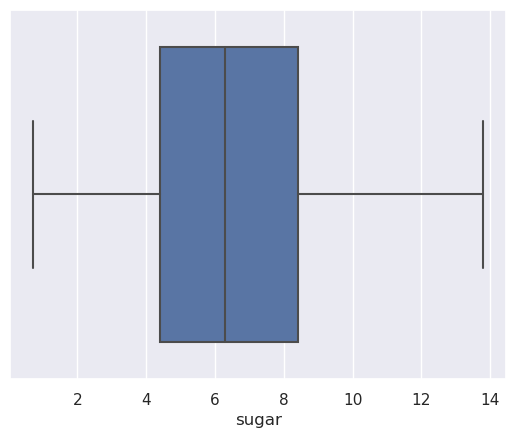

In [115]:
# Boxplot 'sugar'
sns.boxplot(x=lsd['sugar'])

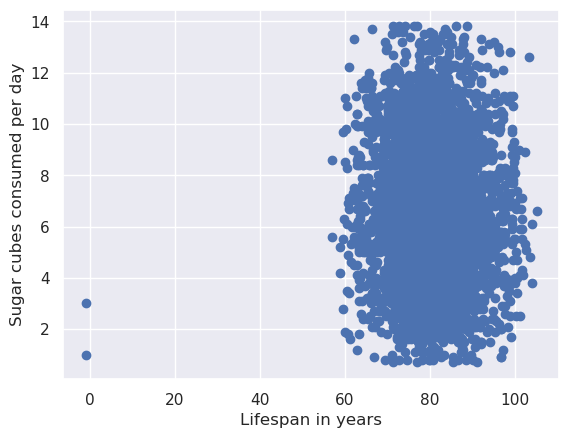

In [116]:
x = lsd['lifespan']
y = lsd['sugar']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Sugar cubes consumed per day')
display(plt.scatter(x, y))

From this visualisation I conclude that there is barely any correlation between sugarconsumption and the (calculated) lifespan.  
I am beginning to wonder which factor(s) do significally influence the lifespan of people?

### Lifespan

<AxesSubplot: xlabel='lifespan'>

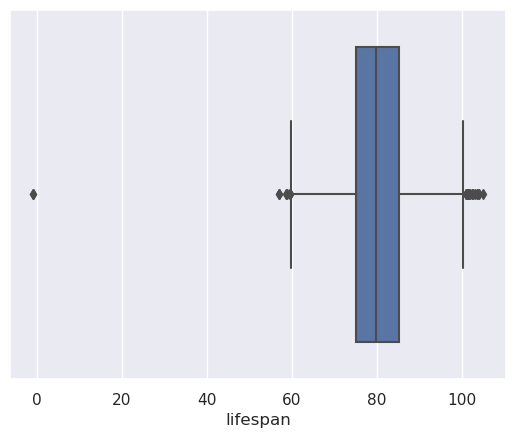

In [118]:
# Boxplot 'lifespan'
sns.boxplot(x= lsd['lifespan'])
# There are outliers here

In [119]:
# So there may be lifespan-outliers here (Age limits chosen on sight.)

lifespOutl = lsd.query('lifespan <= 60' and 'lifespan >= 100') 
display(lifespOutl.shape)

# Apparently in this population there were a total of 31 people with a lifespan'60 or younger' or ' 100 or older'.

# Apparently in this population there were 9 people with a lifespan'46 or younger'
display(lsd.columns)
# No bmi column the first time

(31, 8)

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan'],
      dtype='object')

## BMI column calculated on original dataframe (with outliers)

### What is a healthy BMI?
BMI gives an estimate of how healthy your body weight is. You can calculate BMI for women, men and children from 2 years of age.  

BMI is less suitable if you are very muscular, pregnant, breastfeeding or of Asian descent.  
*Note:* we have no information about the different races in our population.  
For adults, a healthy BMI is between 18.5 and 25. But this does not apply to everyone.  
For the elderly and children, different limits for underweight, overweight and healthy weight apply. 

### Outcome BMI from 70 years of age

There are no official cut-off points for BMI for people aged 70 and over. In the BMI meter, we have assumed BMI limits for underweight, healthy weight and (severe) overweight to be higher than 19-69. This is due to the risk of disease.  
This is because elderly people are only at higher risk of disease at a BMI score of 28 or higher, and are already at higher risk of malnutrition at a BMI score lower than 22.

More info on: https://www.voedingscentrum.nl/bmi

In [121]:
#BMI-column in orig df (with outliers), rounded to 0 marks behind the '.' 

lsd['bmi'] = round(lsd['mass']/((lsd['length']**2)*0.0001))
display(lsd.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.0
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,36.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,23.0


In [123]:
lsd.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,82.280127,183.879344,92.273837,2.403353,9.812677,2.266006,6.484973,80.137959,27.683798
std,7.440070,12.627470,25.800771,1.170593,6.919057,1.801020,2.709868,8.041656,8.713914
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,-1.000000,11.000000
25%,77.600000,175.000000,71.425000,1.500000,3.400000,0.600000,4.400000,75.000000,21.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000,26.000000
75%,86.700000,193.000000,110.875000,3.200000,15.900000,4.000000,8.400000,85.200000,33.000000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000,66.000000


<AxesSubplot: xlabel='bmi'>

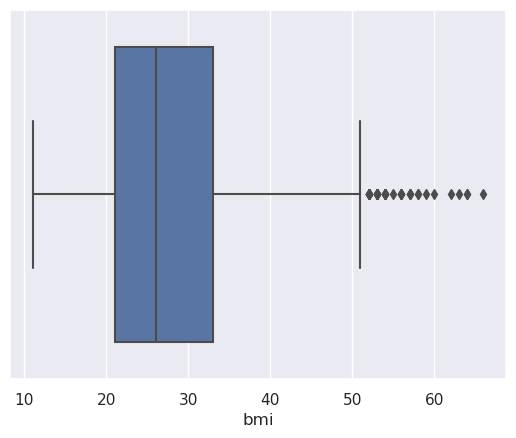

In [124]:
# Boxplot 'bmi'
sns.boxplot(x=lsd['bmi'])
# There may be outliers here

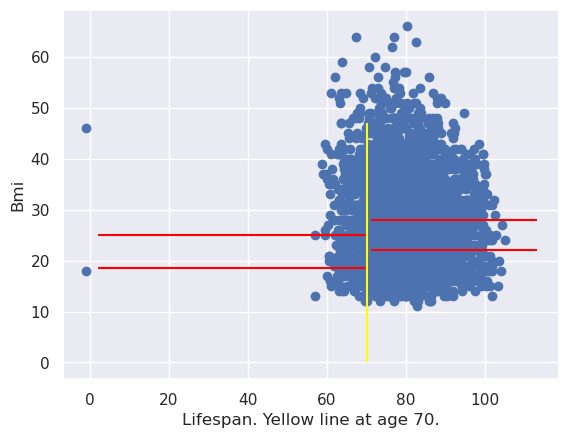

In [125]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html
# matplotlib.pyplot.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
x = lsd['lifespan']
y = lsd['bmi']
color1 = ['red']
color2 = ['yellow']
minBmi = plt.hlines(18.5, xmin = 2, xmax = 70, colors = color1)
maxBmi = plt.hlines(25, xmin = 2, xmax = 70, colors = color1)
minBmiEld = plt.hlines(22, xmin = 71, xmax = 113, colors = color1)
maxBmiEld= plt.hlines(28, xmin = 71, xmax = 113, colors = color1)
age70 = plt.vlines(70, ymin = 0, ymax = 47, colors = color2)
xlabel = plt.xlabel('Lifespan. Yellow line at age 70.')
ylabel = plt.ylabel('Bmi')
display(plt.scatter(x, y))

I placed a yellow line at 70.  
It strikes me (by eye) that overweight is a huge problem in this population. 
Over 70 years of age a too low bmi seems to be common, but it does not seem to affect the calculated lifespan as a bmi which is too high.

## Heatmap



,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.030006,0.000654,-0.035257,-0.015208,-0.013323,0.018502,0.923706,0.010281
length,-0.030006,1.000000,-0.000416,0.012258,-0.021369,-0.006838,0.008384,0.017464,-0.440079
mass,0.000654,-0.000416,1.000000,0.007632,-0.009469,0.000895,0.005904,-0.063538,0.887119
exercise,-0.035257,0.012258,0.007632,1.000000,0.021186,-0.024523,-0.008367,0.081928,0.001158
smoking,-0.015208,-0.021369,-0.009469,0.021186,1.000000,-0.012762,0.008103,-0.245163,0.005092
alcohol,-0.013323,-0.006838,0.000895,-0.024523,-0.012762,1.000000,0.004664,-0.057211,0.003158
sugar,0.018502,0.008384,0.005904,-0.008367,0.008103,0.004664,1.000000,-0.002425,0.001815
lifespan,0.923706,0.017464,-0.063538,0.081928,-0.245163,-0.057211,-0.002425,1.000000,-0.074463
bmi,0.010281,-0.440079,0.887119,0.001158,0.005092,0.003158,0.001815,-0.074463,1.000000


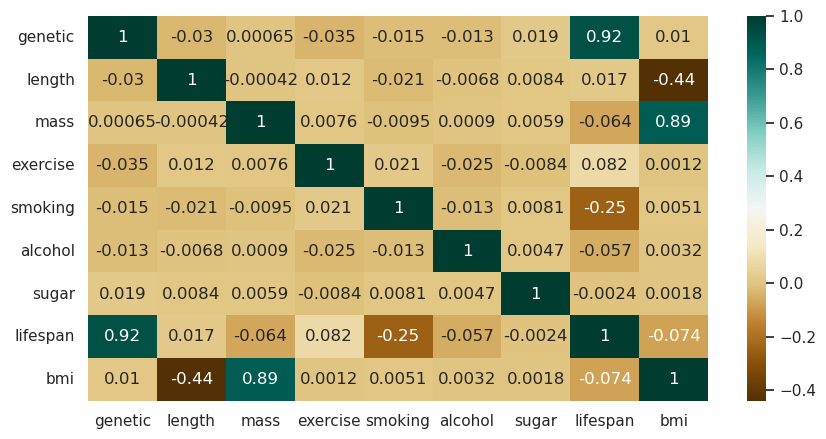

In [130]:
plt.figure(figsize=(10,5))
c= lsd.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Conclusions based on df with outliers
The strongest correlations seem to be between:  
- lifespan and genetic (+0.92): the better the one, the better the other one. __You can't influence that with lifestyle changes.__
- lifespan and smoking (- 0.25): the more one smokes, the less ones lifespan
- lifespan and alcohol (- 0.057): the more one consumes, the lower ones lifespan
- lifespan and exercise (+ 0.082): the more one exercises the longer the lifespan
- lifespan and bmi (- 0.074) : the lower ones bmi, te longer his/her lifespan


## New Dataframe (outliers discarded)

In [126]:
Q1 = lsd.quantile(0.25)
Q3 = lsd.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
lsdNoOutl = lsd[~((lsd < (Q1 - 1.5 * IQR)) |(lsd > (Q3 + 1.5 * IQR))).any(axis=1)]
lsdNoOutl.info()

genetic      77.600
length      175.000
mass         71.425
exercise      1.500
smoking       3.400
alcohol       0.600
sugar         4.400
lifespan     75.000
bmi          21.000
Name: 0.25, dtype: float64

genetic      86.700
length      193.000
mass        110.875
exercise      3.200
smoking      15.900
alcohol       4.000
sugar         8.400
lifespan     85.200
bmi          33.000
Name: 0.75, dtype: float64

genetic      9.10
length      18.00
mass        39.45
exercise     1.70
smoking     12.50
alcohol      3.40
sugar        4.00
lifespan    10.20
bmi         12.00
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   3975 non-null   float64
 1   length    3975 non-null   float64
 2   mass      3975 non-null   float64
 3   exercise  3975 non-null   float64
 4   smoking   3975 non-null   float64
 5   alcohol   3975 non-null

In [128]:
lsdNoOutl.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,82.036403,184.054088,91.682566,2.404277,9.781031,2.270340,6.484528,79.987044,27.407044
std,7.086730,12.511810,25.225387,1.170234,6.912136,1.803633,2.708536,7.454091,8.290604
min,64.000000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,59.700000,11.000000
25%,77.600000,175.000000,71.300000,1.500000,3.300000,0.600000,4.400000,75.000000,21.000000
50%,81.700000,184.000000,89.000000,2.200000,9.500000,1.700000,6.300000,79.600000,26.000000
75%,86.450000,193.000000,110.000000,3.200000,15.850000,4.000000,8.400000,84.900000,33.000000
max,100.300000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,100.400000,51.000000


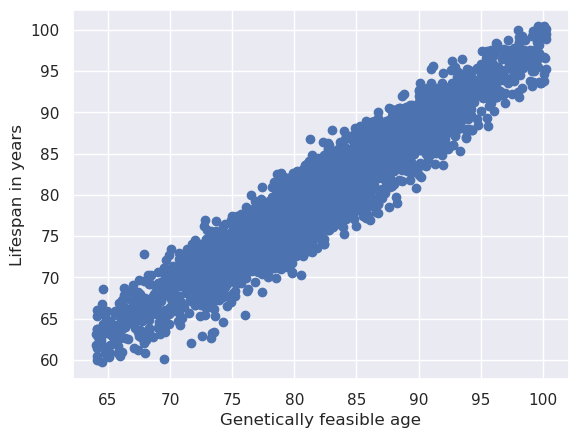

In [131]:
y= lsdNoOutl['lifespan']
x = lsdNoOutl['genetic']
ylabel = plt.ylabel('Lifespan in years')
xlabel = plt.xlabel('Genetically feasible age')
display(plt.scatter(x, y))

The obvious lifespan outliers have been erased

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.038565,-0.000688,-0.044848,-0.010379,-0.012591,0.018085,0.947369,0.013377
length,-0.038565,1.000000,0.033587,0.009143,-0.014092,-0.009894,0.009745,-0.002816,-0.417453
mass,-0.000688,0.033587,1.000000,0.015846,-0.017288,-0.001209,0.006181,-0.056138,0.884226
exercise,-0.044848,0.009143,0.015846,1.000000,0.027391,-0.020558,-0.007418,0.075793,0.011194
smoking,-0.010379,-0.014092,-0.017288,0.027391,1.000000,-0.008698,0.011161,-0.250196,-0.005903
alcohol,-0.012591,-0.009894,-0.001209,-0.020558,-0.008698,1.000000,0.002889,-0.065724,0.003641
sugar,0.018085,0.009745,0.006181,-0.007418,0.011161,0.002889,1.000000,-0.013538,0.001659
lifespan,0.947369,-0.002816,-0.056138,0.075793,-0.250196,-0.065724,-0.013538,1.000000,-0.056603
bmi,0.013377,-0.417453,0.884226,0.011194,-0.005903,0.003641,0.001659,-0.056603,1.000000


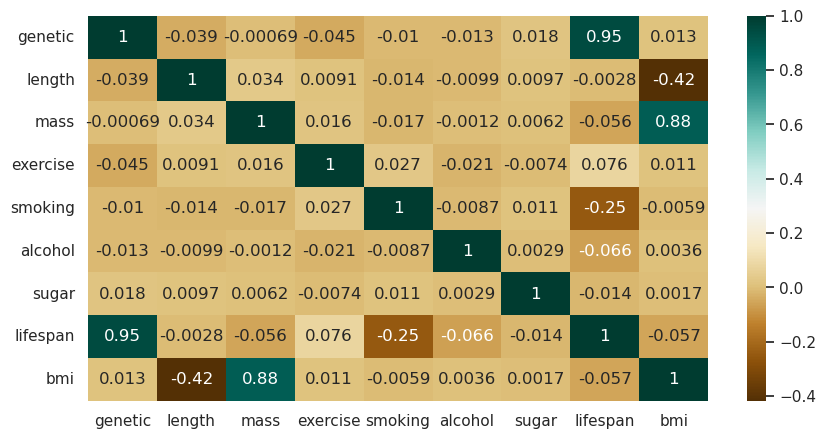

In [132]:
plt.figure(figsize=(10,5))
c= lsdNoOutl.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

All true outliers have been removed from the data frame.  

## Conclusions based on df without outliers
The strongest correlations seem to be between:  
- lifespan and genetic (from +0.92 to + 0.95): the better the one, the better the other one. __You can't influence that with lifestyle changes.__
- lifespan and smoking (- 0.25 - unchanged): the more one smokes, the less ones lifespan
- lifespan and exercise (from + 0.082 to +0.076): the more one exercises the longer the lifespan
- lifespan and alcohol (from - 0.057 to - 0.066 ): the more alcohol one consumes, the lower ones lifespan
- lifespan and bmi (- 0.074) : the lower ones bmi, te longer his/her lifespan